## DESCRIPTIVE AND CLASSICAL METHODS

In [1]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


#### TASK 1-DATA SMOOTHING

In [2]:
#IMPORTING DATASET
df=pd.read_csv('DS3_C1_S2_Weather_Data_Practice.csv')
df=df.iloc[:1460]
df.head(2)

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9


In [3]:
Temp=df[['Temp']]
Temp.head(2)

,Temp
0,20.7
1,17.9


In [4]:
lags=40
rolling_avg = Temp.rolling(window=lags).mean()

In [5]:
df_ts = pd.DataFrame({'actual':Temp['Temp'], 'ma':rolling_avg['Temp']})
print(df_ts)

      actual       ma
0       20.7      NaN
1       17.9      NaN
2       18.8      NaN
3       14.6      NaN
4       15.8      NaN
...      ...      ...
1455    12.2  12.5825
1456    12.0  12.5650
1457    12.6  12.4800
1458    16.0  12.5100
1459    16.4  12.5650

[1460 rows x 2 columns]


In [6]:
df_ts.actual.head(lags).mean()

17.877499999999994

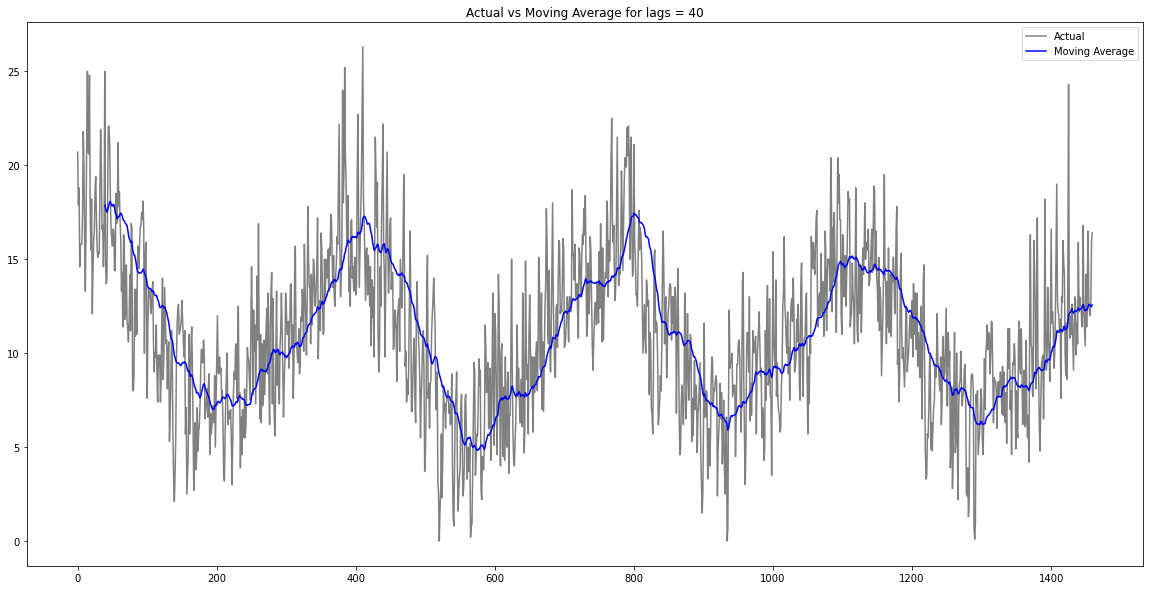

In [7]:
# plot the actual and moving average for comparison
plt.figure(figsize=(20,10))
plt.plot(df_ts.actual, color='gray',label = 'Actual')
plt.plot(df_ts.ma, color='blue', label = 'Moving Average')
plt.title('Actual vs Moving Average for lags = ' + str(lags))
plt.legend()
plt.show()

#### TASK 2-CHARACTERISTICS OF TIME SERIES

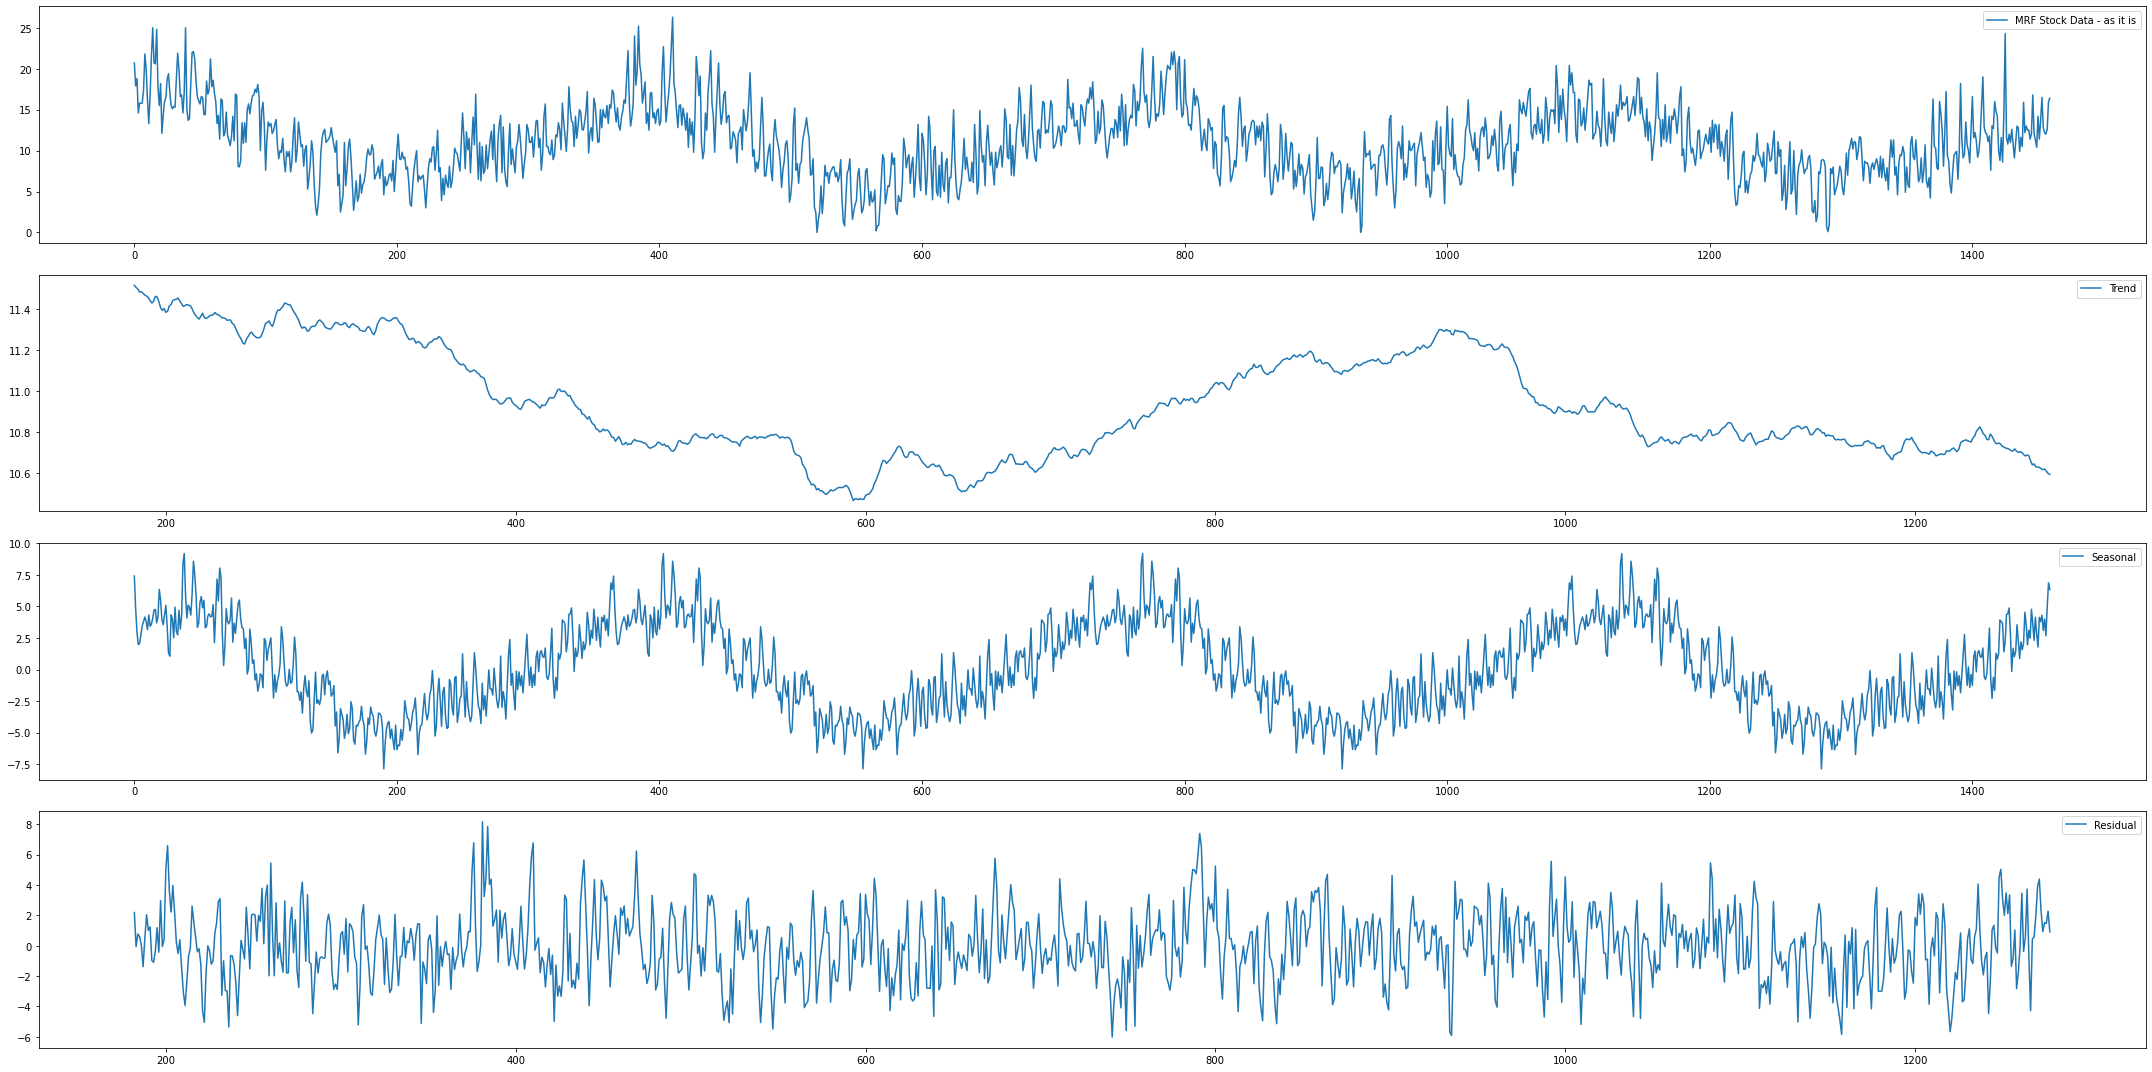

In [8]:
# different components of the Time series data
#As the data contains days we consider it as 365

decomposition=seasonal_decompose(Temp, period=365)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(30,15))

plt.subplot(411)
plt.plot(Temp,label='MRF Stock Data - as it is')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

There is trend and seasonality in this data.

#### TASK 3-DATA STATIONARITY

In [9]:
# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller

In [10]:
Temp.head(2)

,Temp
0,20.7
1,17.9


In [11]:
# ADF test to determine data stationarity
def checkStationarity(data):
    pvalue = adfuller(data['Temp'])[1]

    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)

    return msg

In [12]:
# function call
print(checkStationarity(Temp))

pvalue=0.021485380702352324. Data is Stationary. Proceed to model building


#### TASK 4-SMOOTHEN THE DATA

#### SIMPLE EXPONENTIAL SMOOTHING

In [13]:
# read the data
temp_data = pd.read_csv('DS3_C1_S2_Weather_Data_Practice.csv',index_col='Date',parse_dates=True)

In [14]:
data=temp_data['Temp']

In [15]:
def simplesmoothing(data,alpha):
    model = SimpleExpSmoothing(data).fit(smoothing_level=alpha,optimized=False)
    pdct = model.fittedvalues
    df = pd.DataFrame({'actual':data, 'forecast':pdct})
    return(model,df)

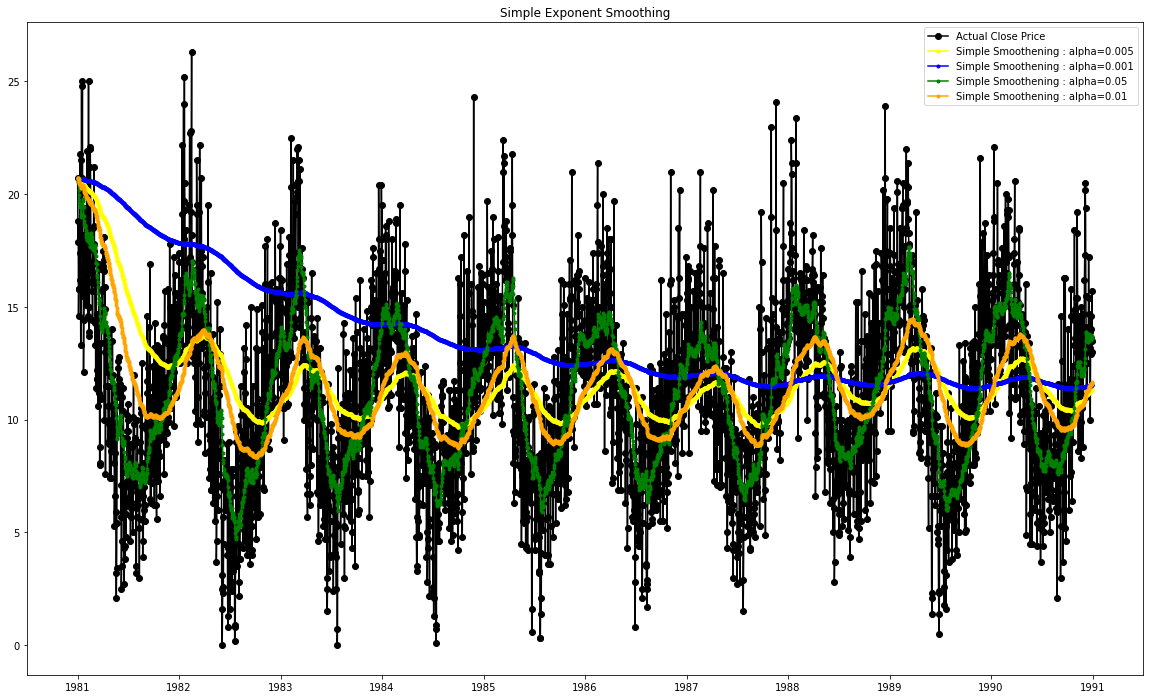

In [16]:
# create forecast for different values of alpha. Plot and understand the charts

# dictionary to store the forecast for each alpha
d_simple_exp = {}
alphas = [0.005,0.001,0.05,0.01]
for a in alphas:
    model, df = simplesmoothing(data,a)
    d_simple_exp[a] = df.forecast
    
colors = ['yellow','blue','green','orange']
# plot the actual and forecast data
fig,ax = plt.subplots(1,1,figsize=(20,12))
plt.plot(data, marker='o', color='black',label='Actual Close Price')

for i in range(len(alphas)):
    plt.plot(d_simple_exp[alphas[i]],marker='.',color=colors[i],label='Simple Smoothening : alpha=' + str(alphas[i]))

plt.title('Simple Exponent Smoothing')
plt.legend()
plt.show()

#### DOUBLE EXPONENTIAL SMOOTHING

In [17]:
# Double Exponent - when there is a trend, no seasonality (Holts' method) 
# parameters: alpha, beta

model = ExponentialSmoothing(data,trend='additive').fit(smoothing_level=0.002, smoothing_slope=0.05)

# forecast with double exponent smoothing
f_dexp = model.fittedvalues
# print(f_dexp)

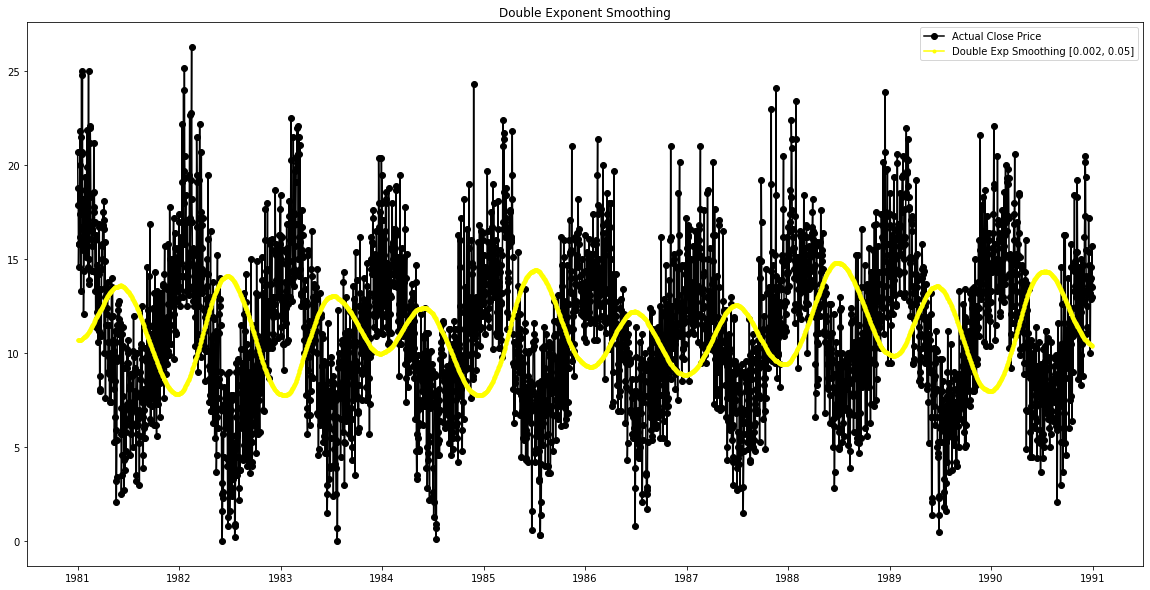

In [18]:
# plot the actual and smooth data
plt.figure(figsize=(20,10))
plt.plot(data,marker='o',color='black',label='Actual Close Price')
plt.plot(f_dexp, marker='.',color='yellow',label='Double Exp Smoothing [0.002, 0.05]')
plt.legend()
plt.title('Double Exponent Smoothing')
plt.show()

#### TRIPLE EXPONENTIAL SMOOTHING

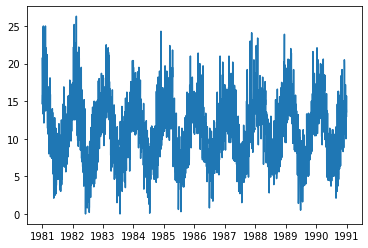

In [19]:
# plot the data
plt.plot(temp_data)
plt.show()

In [20]:
# build model
model = ExponentialSmoothing(temp_data,trend='add',seasonal='add',seasonal_periods=365).fit()

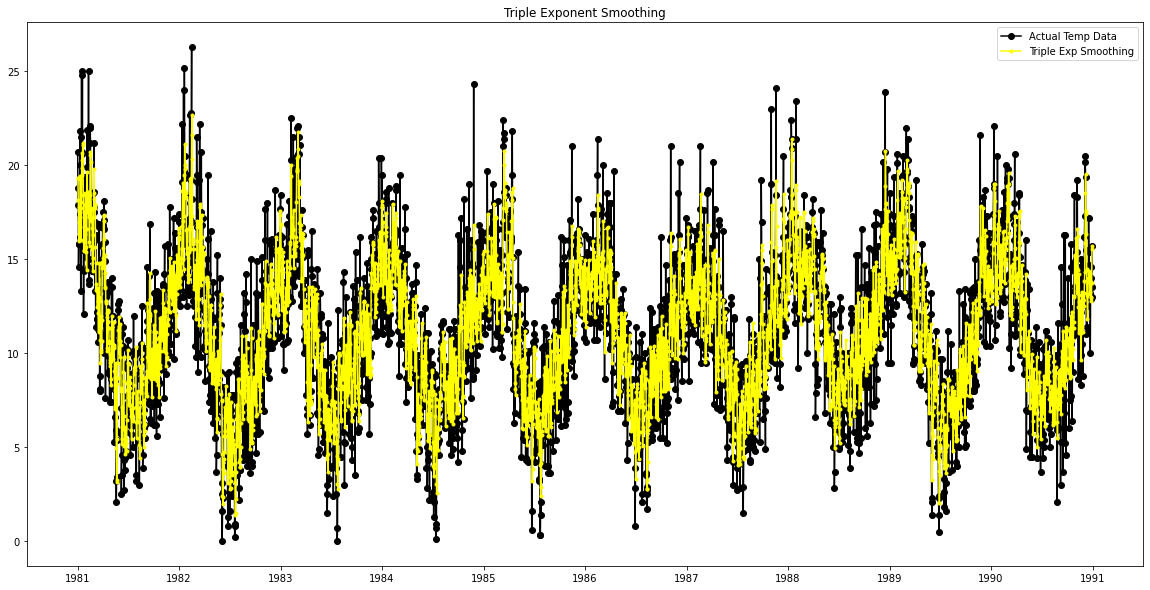

In [21]:
# plot the actual and triple smoothing values
plt.figure(figsize=(20,10))
plt.plot(temp_data, marker='o',color='black',label='Actual Temp Data')
plt.plot(model.fittedvalues,marker='.',color='yellow',label='Triple Exp Smoothing')
plt.legend()
plt.title('Triple Exponent Smoothing')
plt.show()

##### CONCLUSION:-

Triple smoothing is best smoothing method, where there is both trend and seasonality.

In [22]:
#END